In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

In [4]:
with open ("H:\\study\\360Digitmg\\Association Rules\\Assignments\\groceries.csv",'r') as f:
    groceries = f.read()

In [66]:
groceries = groceries.split('\n')

In [67]:
groceries

['citrus fruit,semi-finished bread,margarine,ready soups',
 'tropical fruit,yogurt,coffee',
 'whole milk',
 'pip fruit,yogurt,cream cheese ,meat spreads',
 'other vegetables,whole milk,condensed milk,long life bakery product',
 'whole milk,butter,yogurt,rice,abrasive cleaner',
 'rolls/buns',
 'other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer)',
 'pot plants',
 'whole milk,cereals',
 'tropical fruit,other vegetables,white bread,bottled water,chocolate',
 'citrus fruit,tropical fruit,whole milk,butter,curd,yogurt,flour,bottled water,dishes',
 'beef',
 'frankfurter,rolls/buns,soda',
 'chicken,tropical fruit',
 'butter,sugar,fruit/vegetable juice,newspapers',
 'fruit/vegetable juice',
 'packaged fruit/vegetables',
 'chocolate',
 'specialty bar',
 'other vegetables',
 'butter milk,pastry',
 'whole milk',
 'tropical fruit,cream cheese ,processed cheese,detergent,newspapers',
 'tropical fruit,root vegetables,other vegetables,frozen dessert,rolls/buns,flour,sweet spreads,sal

In [31]:
# filepath  ="H:\\study\\360Digitmg\\Association Rules\\Assignments\\groceries.csv"

# df = pd.read_csv(filepath, sep='delimiter', header=None, )

C:\Users\hp\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [68]:
groceries_lst = []

In [69]:
for products in groceries:
    groceries_lst.append(products.split(','))

In [70]:
groceries_lst

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['pot plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk

In [73]:
all_groceries_lst = [i for item in groceries_lst for i in item]

In [74]:
from collections import Counter
item_freq = Counter(all_groceries_lst)

In [75]:
item_freq

Counter({'citrus fruit': 814,
         'semi-finished bread': 174,
         'margarine': 576,
         'ready soups': 18,
         'tropical fruit': 1032,
         'yogurt': 1372,
         'coffee': 571,
         'whole milk': 2513,
         'pip fruit': 744,
         'cream cheese ': 390,
         'meat spreads': 42,
         'other vegetables': 1903,
         'condensed milk': 101,
         'long life bakery product': 368,
         'butter': 545,
         'rice': 75,
         'abrasive cleaner': 35,
         'rolls/buns': 1809,
         'UHT-milk': 329,
         'bottled beer': 792,
         'liquor (appetizer)': 78,
         'pot plants': 170,
         'cereals': 56,
         'white bread': 414,
         'bottled water': 1087,
         'chocolate': 488,
         'curd': 524,
         'flour': 171,
         'dishes': 173,
         'beef': 516,
         'frankfurter': 580,
         'soda': 1715,
         'chicken': 422,
         'sugar': 333,
         'fruit/vegetable juice': 711,
   

In [76]:
item_freq = sorted(item_freq.items(), key=lambda x:x[1])

In [80]:
frequencies = list(reversed([i[1] for i in item_freq]))

In [82]:
items = list(reversed([i[0] for i in item_freq]))

In [87]:
groceries_series = pd.DataFrame(pd.Series(groceries_lst))

In [90]:
groceries_series.rename(columns={0:'Products'},inplace=True)

In [92]:
#remove last empty transaction
groceries_series.iloc[:9835,:]

,Products
0,"[citrus fruit, semi-finished bread, margarine,..."
1,"[tropical fruit, yogurt, coffee]"
2,[whole milk]
3,"[pip fruit, yogurt, cream cheese , meat spreads]"
4,"[other vegetables, whole milk, condensed milk,..."
...,...
9830,"[sausage, chicken, beef, hamburger meat, citru..."
9831,[cooking chocolate]
9832,"[chicken, citrus fruit, other vegetables, butt..."
9833,"[semi-finished bread, bottled water, soda, bot..."


In [94]:
#creating dummy columns for each item in each transaction, using col name as item name
X = groceries_series.Products.str.join(sep="*").str.get_dummies(sep="*")

In [95]:
X

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9834,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [102]:
df = apriori(X, min_support=0.0075,max_len=4,use_colnames = True)

In [105]:
df.sort_values('support',ascending=False,inplace=True)

In [107]:
df_ar = association_rules(df,metric='confidence',min_threshold=0.6)

In [108]:
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(yogurt, butter)",(whole milk),0.014640,0.25549,0.009353,0.638889,2.500641,0.005613,2.061720
1,"(root vegetables, butter)",(whole milk),0.012912,0.25549,0.008235,0.637795,2.496361,0.004936,2.055495
2,"(yogurt, other vegetables, root vegetables)",(whole milk),0.012912,0.25549,0.007828,0.606299,2.373084,0.004530,1.891055
3,"(yogurt, other vegetables, tropical fruit)",(whole milk),0.012302,0.25549,0.007625,0.619835,2.426062,0.004482,1.958385


As a result, if item X and Y are bought together more frequently, then several steps can be taken to increase the profit. For instance:

- Cross-Selling can be improved by combining products - items
- The shop layout can be changed so that sales can be improved when certain items are kept together.
- Promotional activities which are an advertising campaign can be carried out to increase the sales of goods that customers do not buy.
- Collective discounts can be offered on these products if the customer buys both of them.

<AxesSubplot:>

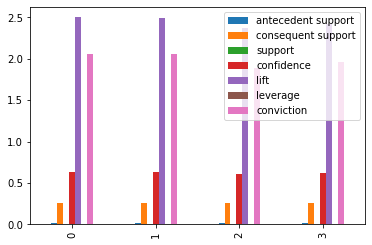

In [111]:
df_ar.plot(kind ='bar')

Support : It is the probability of an event to occur.

Confidence : It is a measure of conditional probability

Lift : It is the probability of all items occurring together divided by the product of antecedent and consequent occurring as if they are independent of each other.